In [1]:
import numpy as np
import pandas as pd
import lumfunc as lf

In [2]:
# UNPACK DATA
# Data is usually catalogued in a .fits file - .csv test file is used here for simplicity

data_table = pd.read_csv('test_catalogue.csv')

ID_list = np.array(data_table['ID'])

RA_list = np.array(data_table['RA'])
Dec_list = np.array(data_table['Dec'])

u_app_mag_list = np.array(data_table['u_mag'])
u_app_mag_err_list = np.array(data_table['u_mag_err'])
g_app_mag_list = np.array(data_table['g_mag'])
g_app_mag_err_list = np.array(data_table['g_mag_err'])
r_app_mag_list = np.array(data_table['r_mag'])
r_app_mag_err_list = np.array(data_table['r_mag_err'])
i_app_mag_list = np.array(data_table['i_mag'])
i_app_mag_err_list = np.array(data_table['i_mag_err'])
Z_app_mag_list = np.array(data_table['Z_mag'])
Z_app_mag_err_list = np.array(data_table['Z_mag_err'])
Y_app_mag_list = np.array(data_table['Y_mag'])
Y_app_mag_err_list = np.array(data_table['Y_mag_err'])
J_app_mag_list = np.array(data_table['J_mag'])
J_app_mag_err_list = np.array(data_table['J_mag_err'])
H_app_mag_list = np.array(data_table['H_mag'])
H_app_mag_err_list = np.array(data_table['H_mag_err'])
K_app_mag_list = np.array(data_table['K_mag'])
K_app_mag_err_list = np.array(data_table['K_mag_err'])

z_photo_list = np.array(data_table['z_photo'])
z_spec_list = np.array(data_table['z_spec'])

In [3]:
r_maggies_list = lf.get_maggy(r_app_mag_list)
print(r_maggies_list[0:4])

[2.17126084e-08 1.88972757e-08 9.39864400e-09 3.74726494e-08]


In [4]:
lf.get_maggy(np.array([19.15822, 19.309002, 20.067337, 18.565714]))

array([2.17126084e-08, 1.88972757e-08, 9.39864400e-09, 3.74726494e-08])

In [5]:
r_maggy_inv_var_list = lf.get_maggy_inv_var(r_maggies_list, r_app_mag_err_list)
print(r_maggy_inv_var_list[0:4])

[2.61353653e+20 2.21539925e+20 2.63295704e+20 1.52030876e+20]


In [6]:
lf.get_maggy_inv_var(
    np.array([2.17126084e-08, 1.88972757e-08, 9.39864400e-09, 3.74726494e-08]),
    np.array([0.00309313, 0.0038601, 0.0071193, 0.00234987]))

array([2.61353484e+20, 2.21540499e+20, 2.63295631e+20, 1.52031005e+20])

In [7]:
maggy_ratios_table = pd.read_csv('test_maggy_ratios.csv', delimiter=' ')
r_maggy_ratio_list = np.array(maggy_ratios_table['maggy_ratio'])

In [8]:
# need to add kcorrect functions to get maggy_ratio_list and test:
r_rest_mag_list = lf.get_rest_mag(z_photo_list, r_app_mag_list,
                                  r_maggy_ratio_list)
print(r_rest_mag_list[0:4])

	Luminosity distance calculated.
	Absolute magnitude calculated.
	K-corrections calculated.
	Rest-frame magnitude calculated.
[-22.50048222 -20.3671756  -23.61190368 -23.75133511]


In [9]:
lf.get_rest_mag(np.array([0.34, 0.17, 0.61, 0.41]),
                np.array([19.15822, 19.309002, 20.067337, 18.565714]),
                np.array([0.69938735, 0.90226577, 0.43780755, 0.59193305]))

	Luminosity distance calculated.
	Absolute magnitude calculated.
	K-corrections calculated.
	Rest-frame magnitude calculated.


array([-22.50048222, -20.3671756 , -23.61190369, -23.75133512])

In [10]:
zmax_table = pd.read_csv('test_zmax.csv', delimiter=' ')
z_max_list = np.array(zmax_table['zmax'])

In [11]:
survey_area = 2.5 #sq. degrees
Vmax_list = lf.get_volume(survey_area, z_max_list)
print(Vmax_list[:4])

	Comoving distance calculated.
	Survey area converted.
	Comoving volume calculated.
[1756716.17902236  178625.22666027 2447025.54638078 2287569.96087901]


In [12]:
lf.get_volume(2.5, np.array([0.50523681, 0.21884399, 0.57489149, 0.55985663]))

	Comoving distance calculated.
	Survey area converted.
	Comoving volume calculated.


array([1756716.14859094,  178625.22895137, 2447025.56779186,
       2287569.99514156])

In [13]:
n_bins = 10
M_list, M_err_list, phi_list = lf.get_binned_phi(r_rest_mag_list, Vmax_list,
                                                 n_bins)
print(M_list)
print(M_err_list)
print(phi_list)

[-25.1487769  -23.86987184 -22.59096677 -21.31206171 -20.03315665
 -18.75425159 -17.47534652 -16.19644146 -14.9175364  -13.63863134]
[0.63945253 0.63945253 0.63945253 0.63945253 0.63945253 0.63945253
 0.63945253 0.63945253 0.63945253 0.63945253]
[2.78118218e+02 2.54476157e+02 6.57347457e-05 1.98257155e-04
 4.84943102e-04 1.02149157e-03 1.49165665e-03 4.54012724e-03
 5.08195775e-03 6.14432455e-02]


In [14]:
lf.get_binned_phi(
    np.array([-23, -21, -19, -22, -23, -23, -22, -23, -22, -22, -19, -21]),
    np.array([
        8e+08, 2e+08, 2e+07, 3e+08, 6e+08, 6e+08, 4e+08, 7e+08, 5e+08, 6e+08,
        7e+06, 1e+08
    ]), 4)

(array([-22.5, -21.5, -20.5, -19.5]),
 array([0.5, 0.5, 0.5, 0.5]),
 array([1.06411667e-08, 1.02900000e-08, 0.00000000e+00, 1.32300000e-07]))

In [15]:
n_patches = 10
centers_array = lf.get_patch_centers(RA_list,
                                     Dec_list,
                                     n_patches,
                                     survey='kids',
                                     max_iterations=int(100),
                                     tolerance=1.0e-1)
print(centers_array)

X (100, 2)  centers (10, 2)  tol=0.1  maxiter=100
3 iterations  cluster sizes: [10 11 10  8  8 10 16  1 10 16]
X (662, 2)  centers (10, 2)  tol=0.1  maxiter=100
2 iterations  cluster sizes: [ 65  60  50  72  68  95 106  24  48  74]
[[ 2.23297633e+02  9.81275815e-01]
 [ 2.23193101e+02  2.50219646e+00]
 [ 2.23213260e+02  3.28612546e-01]
 [ 2.23265647e+02 -1.95982283e-01]
 [ 2.23186387e+02  1.42541364e+00]
 [ 2.23225546e+02 -7.99113067e-01]
 [ 2.23204490e+02 -1.56123960e+00]
 [ 2.23300703e+02  2.86857892e+00]
 [ 2.23160532e+02  6.87340764e-01]
 [ 2.23235093e+02  2.00605106e+00]]


In [16]:
lf.get_patch_centers(np.array([
    20, 21, 22, 20, 22, 20, 21, 21, 22, 20, 21, 22, 20, 22, 20, 21, 22, 20, 21,
    22, 21, 22, 20, 21
]),
                     np.array([
                         20, 22, 20, 21, 22, 20, 21, 22, 21, 22, 20, 21, 20,
                         21, 22, 20, 22, 20, 21, 21, 22, 20, 21, 22
                     ]),
                     2,
                     survey='kids',
                     max_iterations=int(100),
                     tolerance=1.0e-1)

X (20, 2)  centers (2, 2)  tol=0.1  maxiter=100
3 iterations  cluster sizes: [14  6]
X (24, 2)  centers (2, 2)  tol=0.1  maxiter=100
2 iterations  cluster sizes: [16  8]


array([[20.49916246, 21.00072993],
       [22.        , 21.        ]])

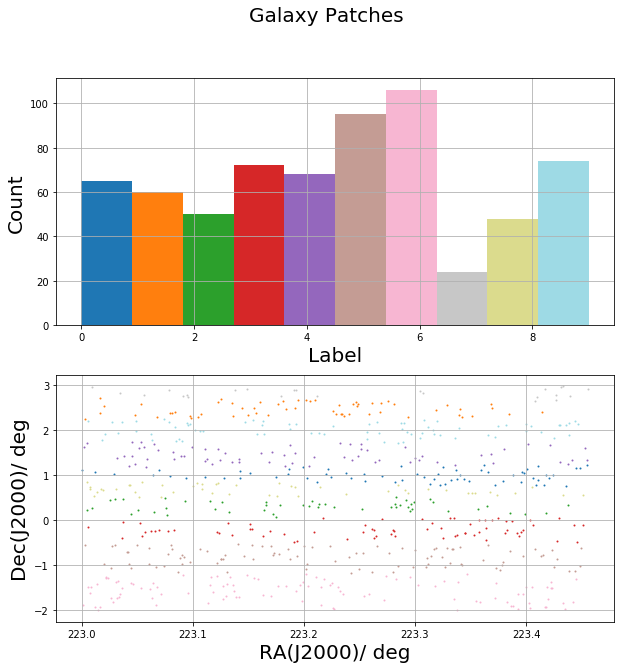

[0 6 4 5]


In [17]:
labels = lf.get_patch_labels(RA_list,
                             Dec_list,
                             n_patches,
                             centers_array,
                             survey='kids',
                             numba_installed=True,
                             plot_savename='test_patches.png')
print(labels[:4])

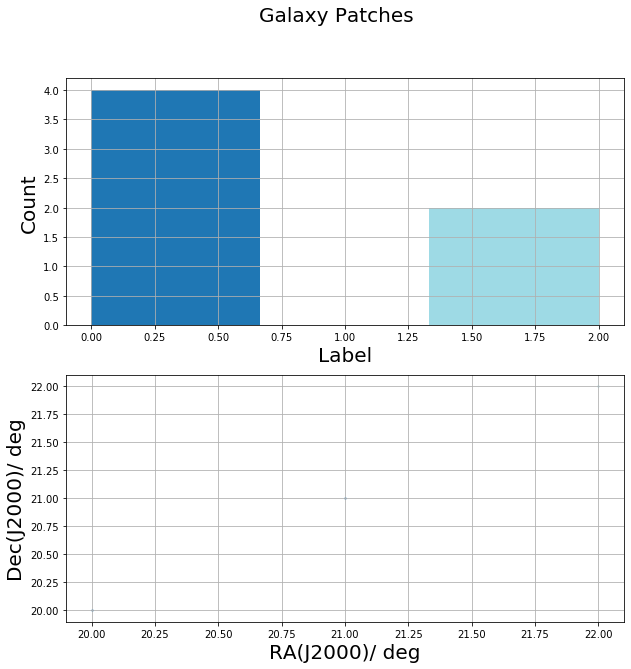

array([0, 0, 2, 0, 0, 2])

In [18]:
lf.get_patch_labels(np.array([20, 21, 22, 20, 21, 22]),
                    np.array([20, 21, 22, 20, 21, 22]),
                    3,
                    np.array([[20, 21], [22, 20], [21, 22], [20, 21], [22, 20],
                              [21, 22]]),
                    survey='kids',
                    numba_installed=True,
                    plot_savename='test2_patches.png')

In [19]:
phi_err_list = lf.get_binned_phi_error(r_rest_mag_list, Vmax_list, labels, n_patches,
                                       n_bins)
print(phi_err_list)

[6.31512459e+02 5.32152268e+02 4.31666309e-05 2.22841109e-04
 4.81148550e-04 3.16386417e-04 6.52443936e-04 4.68698737e-03
 2.05929233e-03 1.60744165e-01]


In [20]:
lf.get_binned_phi_error(
    np.array([-23, -21, -19, -22, -23, -23, -22, -23, -22, -22, -19, -21]),
    np.array([
        8e+08, 2e+08, 2e+07, 3e+08, 6e+08, 6e+08, 4e+08, 7e+08, 5e+08, 6e+08,
        7e+06, 1e+08
    ]), np.array([1, 1, 2, 2, 3, 0, 1, 1, 2, 2, 3, 3]), 4, 4)

array([9.86494122e-09, 9.90155712e-09, 0.00000000e+00, 1.55859031e-07])

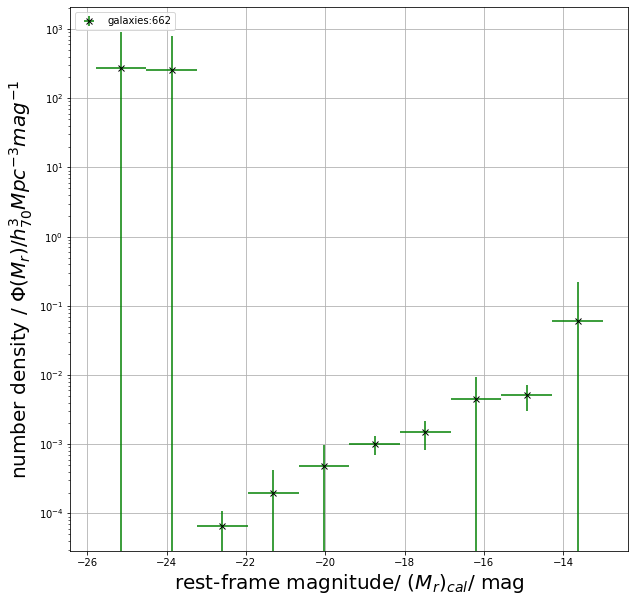

In [21]:
M_list, M_err_list, Phi_list, Phi_err_list = lf.get_plot(
    r_rest_mag_list,
    Vmax_list,
    n_bins,
    RA_list,
    Dec_list,
    n_patches,
    centers_array,
    survey='kids',
    numba_installed=True,
    plot_savename='test_LF.png')

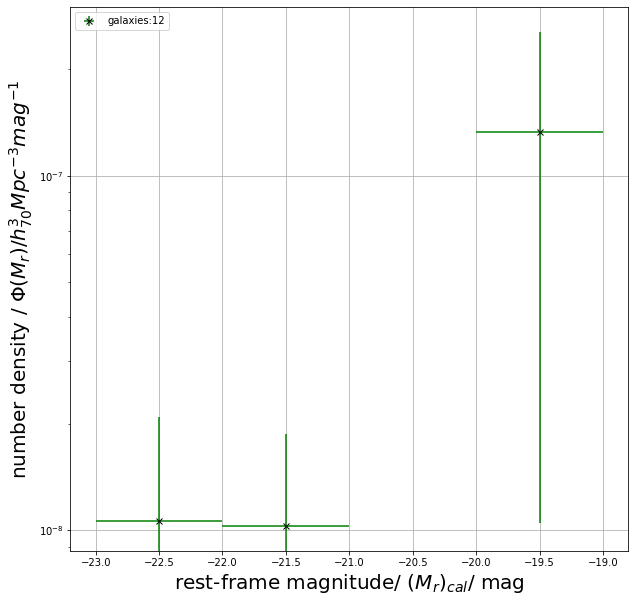

(array([-22.5, -21.5, -20.5, -19.5]),
 array([0.5, 0.5, 0.5, 0.5]),
 array([1.06411667e-08, 1.02900000e-08, 0.00000000e+00, 1.32300000e-07]),
 array([1.01898861e-08, 8.40174982e-09, 0.00000000e+00, 1.21812068e-07]))

In [22]:
lf.get_plot(
    np.array([-23, -21, -19, -22, -23, -23, -22, -23, -22, -22, -19, -21]),
    np.array([
        8e+08, 2e+08, 2e+07, 3e+08, 6e+08, 6e+08, 4e+08, 7e+08, 5e+08, 6e+08,
        7e+06, 1e+08
    ]),
    4,
    np.array([20, 21, 22, 20, 21, 22, 20, 21, 22, 20, 21, 22]),
    np.array([20, 21, 22, 20, 21, 22, 20, 21, 22, 20, 21, 22]),
    3,
    np.array([[20, 21], [22, 20], [21, 22], [20, 21], [22, 20], [21, 22],
              [20, 21], [22, 20], [21, 22], [20, 21], [22, 20], [21, 22]]),
    plot_savename='test2_LF.png')

In [23]:
maggy_ratios_table = pd.read_csv('test_g_maggy_ratios.csv', delimiter=' ')
g_maggy_ratio_list = np.array(maggy_ratios_table['maggy_ratio'])
g_rest_mag_list = lf.get_rest_mag(z_photo_list, g_app_mag_list,
                                  g_maggy_ratio_list)

	Luminosity distance calculated.
	Absolute magnitude calculated.
	K-corrections calculated.
	Rest-frame magnitude calculated.


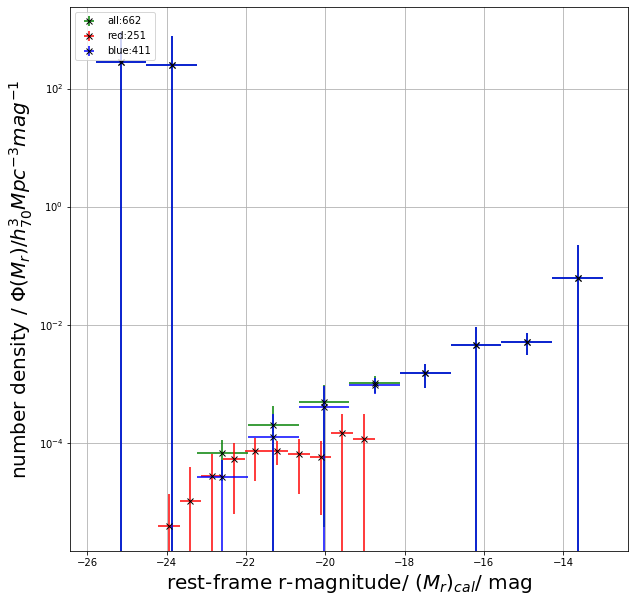

In [24]:
colour_cut_slope = 0.0
colour_cut_intercept = 0.65
all_M_list, all_M_err_list, all_phi_list, all_phi_err_list, red_M_list, red_M_err_list, red_phi_list, red_phi_err_list, blue_M_list, blue_M_err_list, blue_phi_list, blue_phi_err_list = lf.filter_plot_by_colour(
    colour_cut_slope,
    colour_cut_intercept,
    r_rest_mag_list,
    g_rest_mag_list,
    Vmax_list,
    n_bins,
    RA_list,
    Dec_list,
    n_patches,
    centers_array,
    survey='kids',
    numba_installed=True,
    plot_savename='test_LF_colour.png')

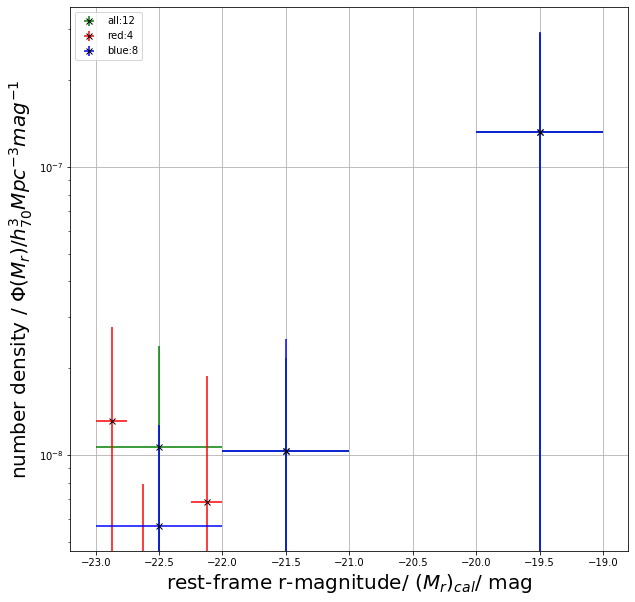

(array([-22.5, -21.5, -20.5, -19.5]),
 array([0.5, 0.5, 0.5, 0.5]),
 array([1.06411667e-08, 1.02900000e-08, 0.00000000e+00, 1.32300000e-07]),
 array([1.32736524e-08, 1.13760230e-08, 0.00000000e+00, 1.60058333e-07]),
 array([-22.875, -22.625, -22.375, -22.125]),
 array([0.125, 0.125, 0.125, 0.125]),
 array([1.30666667e-08, 0.00000000e+00, 0.00000000e+00, 6.86000000e-09]),
 array([1.47108849e-08, 7.92124569e-09, 0.00000000e+00, 1.18818685e-08]),
 array([-22.5, -21.5, -20.5, -19.5]),
 array([0.5, 0.5, 0.5, 0.5]),
 array([5.6595e-09, 1.0290e-08, 0.0000e+00, 1.3230e-07]),
 array([7.03568168e-09, 1.49510234e-08, 0.00000000e+00, 1.61625741e-07]))

In [25]:
lf.filter_plot_by_colour(
    0.0,
    0.65,
    np.array([-23, -21, -19, -22, -23, -23, -22, -23, -22, -22, -19, -21]),
    np.array([-23.1, -22.4, -23.5, -22.1, -19.2, -21.3, -21.2, -19.3, -23.6, -22.7, -23.8, -22.9]),
    np.array([
        8e+08, 2e+08, 2e+07, 3e+08, 6e+08, 6e+08, 4e+08, 7e+08, 5e+08, 6e+08,
        7e+06, 1e+08
    ]),
    4,
    np.array([20, 21, 22, 20, 21, 22, 20, 21, 22, 20, 21, 22]),
    np.array([20, 21, 22, 20, 21, 22, 20, 21, 22, 20, 21, 22]),
    4,
    np.array([[20, 21], [22, 20], [21, 22], [20, 21], [22, 20], [21, 22],
              [20, 21], [22, 20], [21, 22], [20, 21], [22, 20], [21, 22]]),
    plot_savename='test2_LF_colour.png')

In [26]:
M_star_guess = -20.7
phi_star_guess = 9.5e-3
alpha_guess = -1.3
sch1_model_Phi_list = lf.SchechterMagModel(M_list, M_star_guess,
                                           phi_star_guess, alpha_guess)
print(sch1_model_Phi_list)

[1.85685848e-29 3.25671139e-11 1.72458831e-05 1.27468679e-03
 6.12395219e-03 1.26803536e-02 2.02617665e-02 2.98927403e-02
 4.30310959e-02 6.14770530e-02]


In [27]:
lf.SchechterMagModel(
    np.array([
        -25.1487769, -23.86987184, -22.59096677, -21.31206171, -20.03315665,
        -18.75425159, -17.47534652, -16.19644146, -14.9175364, -13.63863134
    ]), -20.7, 9.5e-3, -1.3)

array([1.85685828e-29, 3.25671116e-11, 1.72458835e-05, 1.27468679e-03,
       6.12395219e-03, 1.26803535e-02, 2.02617665e-02, 2.98927403e-02,
       4.30310959e-02, 6.14770529e-02])

In [28]:
M_star_guess = -20.7
phi_star_1_guess = 6.16e-3
alpha_1_guess = -0.79
phi_star_2_guess = 6.16e-3
alpha_2_guess = -0.79
sch2_model_Phi_list = lf.DoubleSchechterMagModel(M_list, M_star_guess,
                                                 phi_star_1_guess,
                                                 alpha_1_guess,
                                                 phi_star_2_guess,
                                                 alpha_2_guess)
print(sch2_model_Phi_list)

[1.94632963e-28 1.87206201e-10 5.43662983e-05 2.20369342e-03
 5.80607779e-03 6.59304119e-03 5.77743541e-03 4.67441094e-03
 3.69017477e-03 2.89121864e-03]


In [29]:
lf.DoubleSchechterMagModel(
    np.array([
        -25.1487769, -23.86987184, -22.59096677, -21.31206171, -20.03315665,
        -18.75425159, -17.47534652, -16.19644146, -14.9175364, -13.63863134
    ]), -20.7, 6.16e-3, -0.79, 6.16e-3, -0.79)

array([1.94632943e-28, 1.87206188e-10, 5.43662993e-05, 2.20369343e-03,
       5.80607779e-03, 6.59304119e-03, 5.77743541e-03, 4.67441094e-03,
       3.69017477e-03, 2.89121865e-03])

In [30]:
gof = lf.get_gof(phi_list, phi_err_list, sch1_model_Phi_list, 3)
print(gof)

388.1159379365676


In [36]:
lf.get_gof(
    np.array([
        2.78118218e+02, 2.54476157e+02, 6.57347457e-05, 1.98257155e-04,
        4.84943102e-04, 1.02149157e-03, 1.49165665e-03, 4.54012724e-03,
        5.08195775e-03, 6.14432455e-02
    ]),
    np.array([
        6.31512459e+02, 5.32152268e+02, 4.31666309e-05, 2.22841109e-04,
        4.81148550e-04, 3.16386417e-04, 6.52443936e-04, 4.68698737e-03,
        2.05929233e-03, 1.60744165e-01
    ]),
    np.array([
        1.94632963e-28, 1.87206201e-10, 5.43662983e-05, 2.20369342e-03,
        5.80607779e-03, 6.59304119e-03, 5.77743541e-03, 4.67441094e-03,
        3.69017477e-03, 2.89121864e-03
    ]), 3)

79.66254082924551

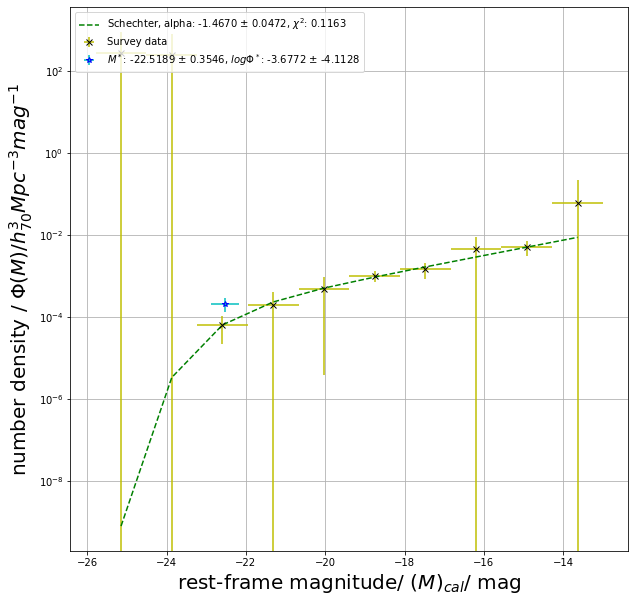

In [32]:
sch1_model_phi_list, chi_sq_1, M_star, M_star_err, phi_star, phi_star_err, alpha_star, alpha_star_err = lf.get_schechter_phi(
    M_list,
    M_err_list,
    all_phi_list,
    all_phi_err_list,
    np.array([M_star_guess, phi_star_guess, alpha_guess]),
    plot_savename='test_Sch.png')

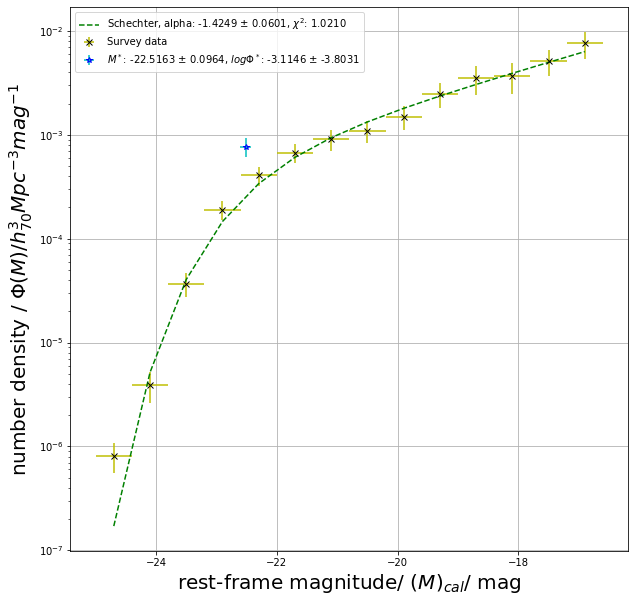

(array([1.71053536e-07, 5.16404480e-06, 4.05370711e-05, 1.46583441e-04,
        3.39318246e-04, 6.07660357e-04, 9.38795731e-04, 1.33220354e-03,
        1.80023894e-03, 2.36519761e-03, 3.05753557e-03, 3.91587143e-03,
        4.98834428e-03, 6.33496571e-03]),
 1.0209802688993401,
 -22.51627500778435,
 0.09643423019822513,
 0.0007681235644217974,
 0.00015735301981608952,
 -1.4248810024852225,
 0.06007607488402875)

In [33]:
lf.get_schechter_phi(np.array([
    -24.7, -24.1, -23.5, -22.9, -22.3, -21.7, -21.1, -20.5, -19.9, -19.3,
    -18.7, -18.1, -17.5, -16.9
]),
    np.ones(14) * 0.3,
    np.array([
        8.1e-07, 3.9e-06, 3.7e-05, 1.9e-04, 4.1e-04, 6.7e-04,
        9.1e-04, 1.1e-03, 1.5e-03, 2.5e-03, 3.5e-03, 3.7e-03,
        5.1e-03, 7.6e-03
    ]),
    np.array([
        2.6e-07, 1.3e-06, 9.5e-06, 3.9e-05, 8.5e-05, 1.4e-04,
        2.1e-04, 2.6e-04, 3.9e-04, 6.9e-04, 1.1e-03, 1.2e-03,
        1.4e-03, 2.2e-03
    ]),
    np.array([-20.71, 9.5e-3, -1.3]),
    plot_savename='test2_Sch.png')

/Users/manasveesaraf/anaconda3/lib/python3.6/site-packages/lumfunc.py:764: RuntimeWarning: overflow encountered in power
  part3 = phi_star2 * 10**(power3)
/Users/manasveesaraf/anaconda3/lib/python3.6/site-packages/lumfunc.py:983: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))


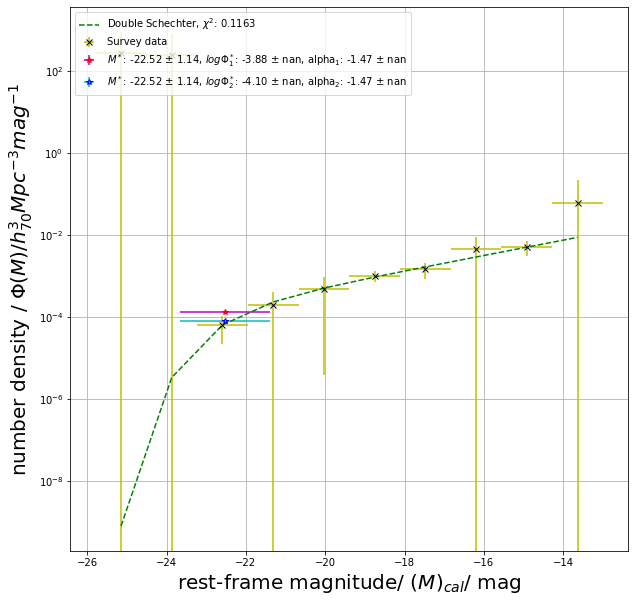

In [34]:
sch2_model_phi_list, chi_sq_1, M_star, M_star_err, phi_star_1, phi_star_err_1, phi_star_2, phi_star_err_2, alpha_star_1, alpha_star_err_1, alpha_star_2, alpha_star_err_2 = lf.get_double_schechter_phi(
    M_list,
    M_err_list,
    all_phi_list,
    all_phi_err_list,
    np.array([
        M_star_guess, phi_star_1_guess, alpha_1_guess, phi_star_2_guess,
        alpha_2_guess
    ]),
    plot_savename='test_dSch.png')

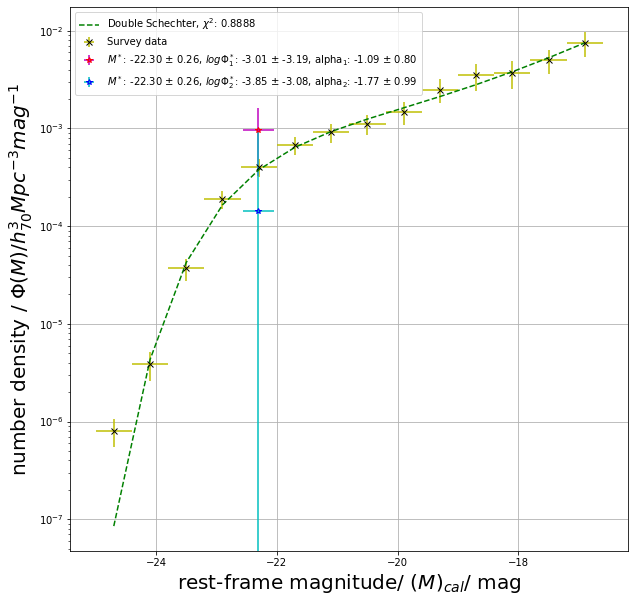

(array([8.52160254e-08, 4.30479510e-06, 4.25294771e-05, 1.65136448e-04,
        3.77248531e-04, 6.40958991e-04, 9.29145543e-04, 1.24659941e-03,
        1.62508333e-03, 2.11836716e-03, 2.80552684e-03, 3.80265411e-03,
        5.28333171e-03, 7.51056271e-03]),
 0.8888283543610924,
 -22.303878380116704,
 0.2646412794527086,
 0.0009668887609189701,
 0.000640187578339006,
 -1.0900241221219484,
 0.7987986322969173,
 0.0001418318772494868,
 0.0008399596540331241,
 -1.774506451062984,
 0.9946532141625982)

In [35]:
lf.get_double_schechter_phi(np.array([
    -24.7, -24.1, -23.5, -22.9, -22.3, -21.7, -21.1, -20.5, -19.9, -19.3,
    -18.7, -18.1, -17.5, -16.9
]),
    np.ones(14) * 0.3,
    np.array([
        8.05e-07, 3.88e-06, 3.69e-05, 1.89e-04,
        4.05e-04, 6.72e-04, 9.09e-04, 1.11e-03,
        1.48e-03, 2.49e-03, 3.51e-03, 3.72e-03,
        5.01e-03, 7.55e-03
    ]),
    np.array([
        2.61e-07, 1.25e-06, 9.52e-06, 3.89e-05,
        8.49e-05, 1.39e-04, 2.00e-04, 2.57e-04,
        3.95e-04, 6.88e-04, 1.10e-03, 1.17e-03,
        1.39e-03, 2.17e-03
    ]),
    np.array([-20.7, 6.16e-3, -0.79, 6.16e-3, -0.79]),
    plot_savename='test2_dSch.png')